In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly.express as px
import os
import time
IMAGES_FOLDER_PATH = "../images"

# Question 1

## Part 1

In [2]:
def average_filter_brute(img,k):

    h,w = img.shape
    
    output = np.zeros([h,w])
    kernel = np.ones([k,k])/k**2
    
    padding_img = np.zeros([h+k-1,w+k-1],dtype='int64')
    padding_img[int((k-1)/2):int(h+(k-1)/2),int((k-1)/2):int(w+(k-1)/2)] = img
    
    for i in range(k,h+k):
        for j in range(k,w+k):
            val = 0
            for ii in range(k):
                for jj in range(k):
                    val = val + (padding_img[i-k+ii][j-k+jj]*kernel[ii][jj])
                    
            output[i-k,j-k] = int(val)
    
    return np.int64(output)

In [3]:
img = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'smoothing.png'),0)

# start_time = time.time()
# smooth_3 = average_filter_brute(img,3)
# print("3x3 filter --- %s seconds ---" % (time.time() - start_time))

# start_time = time.time()
# smooth_5 = average_filter_brute(img,5)
# print("5x5 filter --- %s seconds ---" % (time.time() - start_time))

# plt.figure(figsize = (12,10))
# plt.subplot(131)
# plt.imshow(img, cmap='gray')
# plt.title('Original Image')

# plt.subplot(132)
# plt.imshow(smooth_3, cmap='gray')
# plt.title('Average Filter (3x3)')

# plt.subplot(133)
# plt.imshow(smooth_5, cmap='gray')
# plt.title('Average Filter (5x5)')
# plt.show()

## Part 2

In [4]:
def average_filter_efficient(img,k):
    h,w = img.shape
    
    output = np.zeros([h,w])
    kernel = np.ones([k,k])
    
    padding_img = np.zeros([h+k-1,w+k-1])
    padding_img[int((k-1)/2):int(h+(k-1)/2),int((k-1)/2):int(w+(k-1)/2)] = img
    
    prev_avg_j = 0 # prev avg along horizontal direction (coloumns)
    prev_avg_i = 0 # prev avg along horizontal direction (rows)
    for i in range(k,h+k):
        if i!=k: 
            val = prev_avg_i -sum(sum(padding_img[i-k-1:i-k,0:k]))+ sum(sum(padding_img[i-1:i,0:k]))
        else:
            area_obs = padding_img[0:k,0:k]
            val = sum(sum(kernel*area_obs))
 
        prev_avg_i = int(val)
        
        for j in range(k,w+k):
            if j!=k:
                val = prev_avg_j - sum(sum(padding_img[i-k:i,j-k-1:j-k]))+ sum(sum(padding_img[i-k:i,j-1:j]))
            else:
                val = prev_avg_i

            prev_avg_j = int(val)    
            output[i-k,j-k] = int(val)
                
    return np.int64(output/k**2)

In [5]:
img = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'smoothing.png'),0)

# start_time = time.time()
# smooth_3 = average_filter_efficient(img,3)
# print("3x3 filter --- %s seconds ---" % (time.time() - start_time))

# start_time = time.time()
# smooth_5 = average_filter_efficient(img,5)
# print("5x5 filter --- %s seconds ---" % (time.time() - start_time))

# plt.figure(figsize = (12,10))
# plt.subplot(131)
# plt.imshow(img, cmap='gray')
# plt.title('Original Image')

# plt.subplot(132)
# plt.imshow(smooth_3, cmap='gray')
# plt.title('Average Filter (3x3)')

# plt.subplot(133)
# plt.imshow(smooth_5, cmap='gray')
# plt.title('Average Filter (5x5)')
# plt.show()

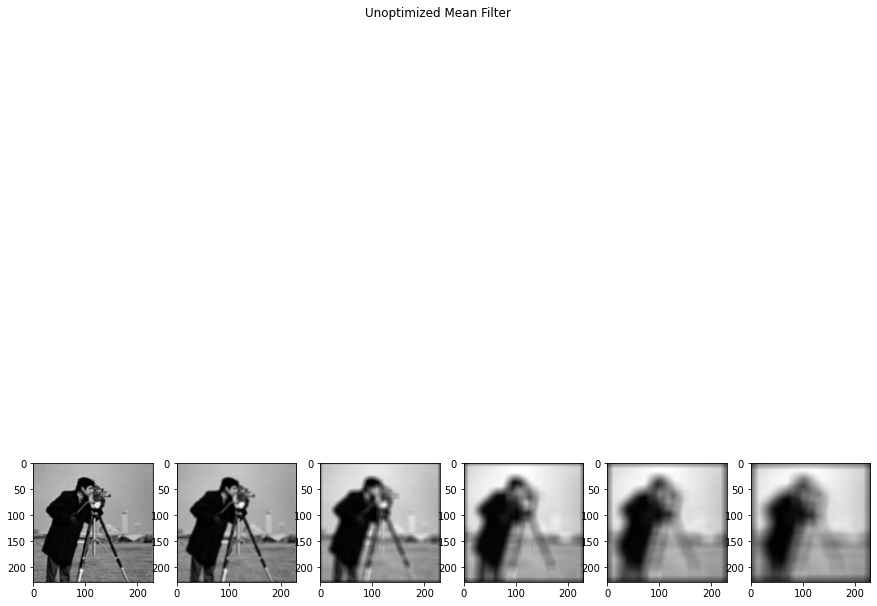

In [6]:
kernel_size = [3,5,11,19,25,31]
efficient_time = []

f, axarr = plt.subplots(1,len(kernel_size),figsize = (15,15))
f.suptitle('Unoptimized Mean Filter')
for i,k in enumerate(kernel_size):
    start_time = time.time()
    smooth = average_filter_efficient(img,k)
    time_taken = (time.time() - start_time)
    efficient_time.append(time_taken)
#     axarr[i].imshow(smooth, cmap='gray',title = 'Average Filter ('+str(k)+' x '+str(k)+')')
    axarr[i].imshow(smooth, cmap='gray')
plt.show()

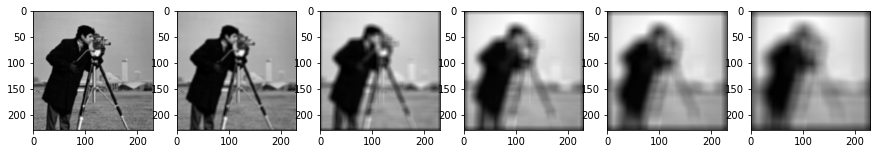

In [7]:
kernel_size = [3,5,11,19,25,31]
brute_force_time = []

f, axarr = plt.subplots(1,len(kernel_size),figsize = (15,15))

for i,k in enumerate(kernel_size):
    start_time = time.time()
    smooth = average_filter_brute(img,k)
    time_taken = (time.time() - start_time)
    brute_force_time.append(time_taken)
#     axarr[i].imshow(smooth, cmap='gray',title = 'Average Filter ('+str(k)+' x '+str(k)+')')
    axarr[i].imshow(smooth, cmap='gray')
plt.show()

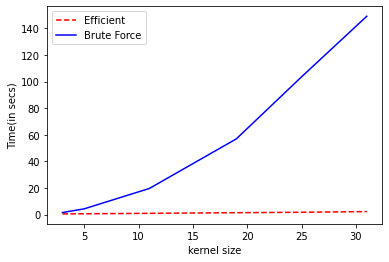

In [8]:
plt.plot(kernel_size,efficient_time,'r--',label='Efficient')
plt.plot(kernel_size,brute_force_time,'b-',label='Brute Force')
plt.xlabel('kernel size')
plt.ylabel('Time(in secs)')
plt.gca().legend()
plt.show()

## Part 4

In [9]:
def median_filter_brute(img,k):

    h,w = img.shape
    
    output = np.zeros([h,w])
    
    padding_img = np.zeros([h+k-1,w+k-1],dtype='int64')
    padding_img[int((k-1)/2):int(h+(k-1)/2),int((k-1)/2):int(w+(k-1)/2)] = img
    
    
    for i in range(int((k-1)/2),h+int((k-1)/2)):
        for j in range(int((k-1)/2),w+int((k-1)/2)):
            mem = np.zeros(256)
            for ii in range(k):
                for jj in range(k):
                       mem[padding_img[i-int((k-1)/2)+ii][j-int((k-1)/2)+jj]] +=1
            curr_sum = 0
            for ii in range(256):
                curr_sum += mem[ii]
                if curr_sum >= int((k*k)/2):
                    output[i-int((k-1)/2),j-int((k-1)/2)] = ii
                    break
    
    return np.int64(output)

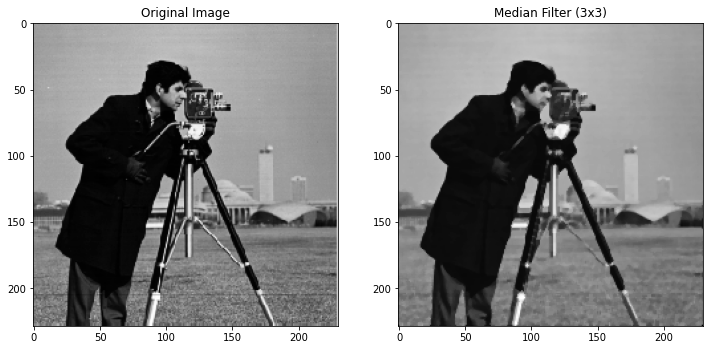

In [10]:
img = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'smoothing.png'),0)

smooth_3 = median_filter_brute(img,3)

plt.figure(figsize = (12,10))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(smooth_3, cmap='gray')
plt.title('Median Filter (3x3)')

plt.show()

In [11]:
def median_filter_efficient(img,k):

    h,w = img.shape
    
    output = np.zeros([h,w])
    
    padding_img = np.zeros([h+k-1,w+k-1],dtype='int64')
    padding_img[int((k-1)/2):int(h+(k-1)/2),int((k-1)/2):int(w+(k-1)/2)] = img
    
    prev_mem_j = np.zeros(256) # prev avg along horizontal direction (coloumns)
    prev_mem_i = np.zeros(256) # prev avg along horizontal direction (rows)
    

    for i in range(int((k-1)/2),h+int((k-1)/2)):
        if i==int((k-1)/2):
            mem = np.zeros(256)
            for ii in range(k):
                for jj in range(k):
                       mem[padding_img[ii,jj]] +=1
        else:
            mem = np.copy(prev_mem_i)
            for px in padding_img[i-int((k-1)/2)-1:i-int((k-1)/2),0:k]:
                mem[px] -= 1
            for px in padding_img[i+int((k-1)/2):i+int((k-1)/2)+1,0:k]:
                mem[px] += 1
        
        prev_mem_i = np.copy(mem)
        
        for j in range(int((k-1)/2),w+int((k-1)/2)):
            if j == int((k-1)/2):
                mem = np.copy(prev_mem_i)
            else:
                mem = np.copy(prev_mem_j)
                for px in padding_img[i-int((k-1)/2):i+int((k-1)/2)+1,j-int((k-1)/2)-1:j-int((k-1)/2)]:
                    mem[px] -= 1
                for px in padding_img[i-int((k-1)/2):i+int((k-1)/2)+1,j+int((k-1)/2):j+int((k-1)/2)+1]:
                    mem[px] += 1
              
            prev_mem_j = np.copy(mem)
                
            curr_sum = 0
            for ii in range(256):
                curr_sum += mem[ii]
                if curr_sum > int((k*k)/2):
                    output[i-int((k-1)/2),j-int((k-1)/2)] = ii
                    break


    return np.int64(output)

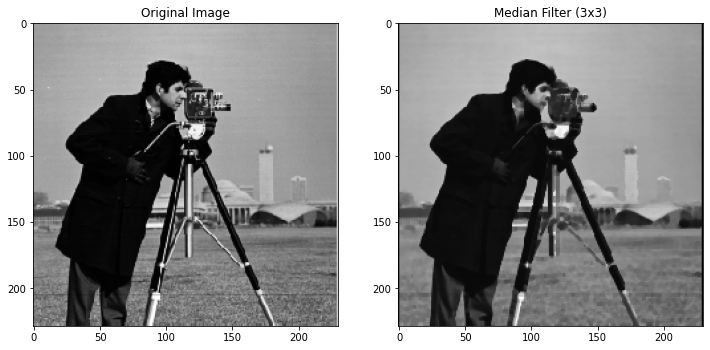

In [12]:
img = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'smoothing.png'),0)

smooth_3 = median_filter_efficient(img,3)

plt.figure(figsize = (12,10))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(smooth_3, cmap='gray')
plt.title('Median Filter (3x3)')

plt.show()

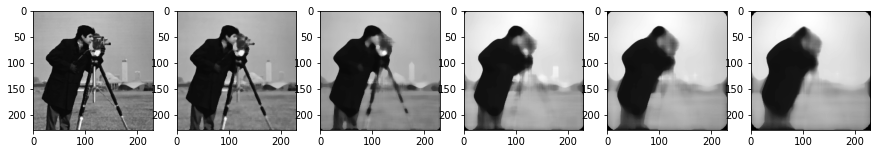

In [13]:
kernel_size = [3,5,11,19,25,31]
brute_time = []

f, axarr = plt.subplots(1,len(kernel_size),figsize = (15,15))

for i,k in enumerate(kernel_size):
    start_time = time.time()
    smooth = median_filter_brute(img,k)
    time_taken = (time.time() - start_time)
    brute_time.append(time_taken)
#     axarr[i].imshow(smooth, cmap='gray',title = 'Average Filter ('+str(k)+' x '+str(k)+')')
    axarr[i].imshow(smooth, cmap='gray')
plt.show()

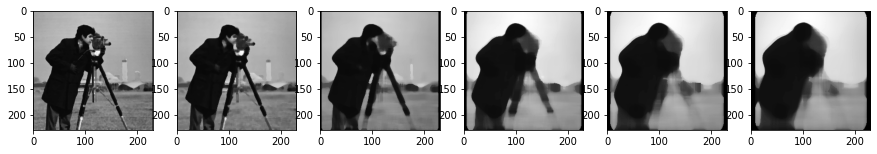

In [14]:
kernel_size = [3,5,11,19,25,31]
efficient_time = []

f, axarr = plt.subplots(1,len(kernel_size),figsize = (15,15))

for i,k in enumerate(kernel_size):
    start_time = time.time()
    smooth = median_filter_efficient(img,k)
    time_taken = (time.time() - start_time)
    efficient_time.append(time_taken)
#     axarr[i].imshow(smooth, cmap='gray',title = 'Average Filter ('+str(k)+' x '+str(k)+')')
    axarr[i].imshow(smooth, cmap='gray')
plt.show()

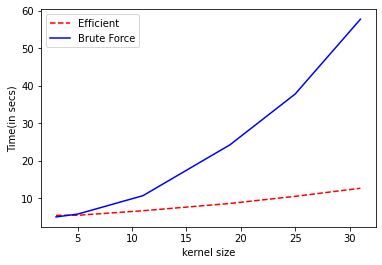

In [15]:
plt.plot(kernel_size,efficient_time,'r--',label='Efficient')
plt.plot(kernel_size,brute_time,'b-',label='Brute Force')
plt.xlabel('kernel size')
plt.ylabel('Time(in secs)')
plt.gca().legend()
plt.show()

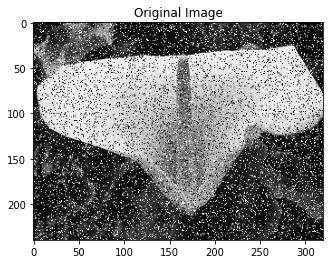

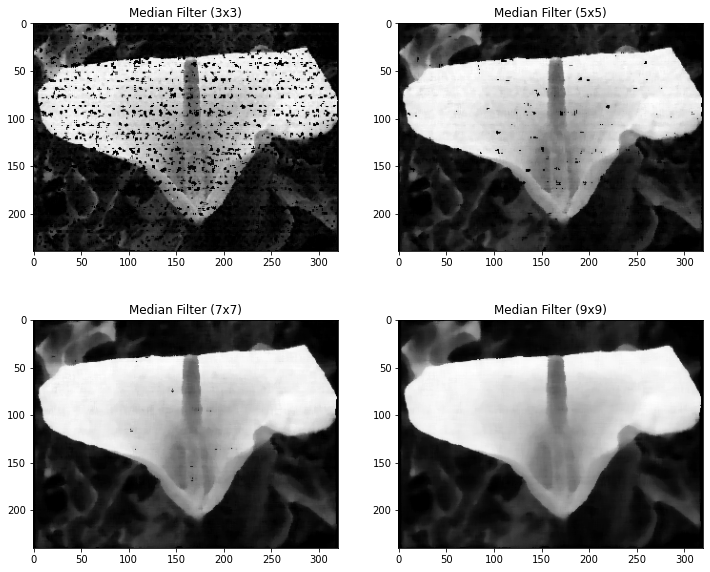

In [16]:
noisy = cv2.imread(os.path.join(IMAGES_FOLDER_PATH, 'Noisy.jpg'),0)
smooth_9 = median_filter_efficient(noisy,9)
smooth_7 = median_filter_efficient(noisy,7)
smooth_5 = median_filter_efficient(noisy,5)
smooth_3 = median_filter_efficient(noisy,3)


plt.imshow(noisy, cmap='gray')
plt.title('Original Image')
plt.show()

plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(smooth_3, cmap='gray')
plt.title('Median Filter (3x3)')

plt.subplot(222)
plt.imshow(smooth_5, cmap='gray')
plt.title('Median Filter (5x5)')

plt.subplot(223)
plt.imshow(smooth_7, cmap='gray')
plt.title('Median Filter (7x7)')

plt.subplot(224)
plt.imshow(smooth_9, cmap='gray')
plt.title('Median Filter (9x9)')

plt.show()